In [95]:
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
group1_states = ['South Dakota', 'Minnesota', 'North Dakota']
group2_states = ['Louisiana', 'Mississippi', 'Oklahoma']

In [54]:
census_csv = r'C:\Users\vjmar\Desktop\DataScience\blue-team-project-1\csv-data\2022-census.csv'
census_df = pd.read_csv(census_csv)
drop_columns = ['SUMLEV', 'ESTIMATESBASE2020', 'REGION', 'STATE', 'DIVISION']
population_df = census_df[census_df['NAME'].isin(group1_states + group2_states)].drop(columns=drop_columns)
population_df

,NAME,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022
32,Louisiana,4651664,4627098,4590241
37,Minnesota,5709852,5711471,5717184
38,Mississippi,2958141,2949586,2940057
48,North Dakota,779518,777934,779261
50,Oklahoma,3964912,3991225,4019800
55,South Dakota,887799,896164,909824


In [55]:
south_dakota_row = census_df[census_df['NAME'] == 'South Dakota']
minnesota_row = census_df[census_df['NAME'] == 'Minnesota']
north_dakota_row = census_df[census_df['NAME'] == 'North Dakota']

louisiana_row = census_df[census_df['NAME'] == 'Louisiana']
mississippi_row = census_df[census_df['NAME'] == 'Mississippi']
oklahoma_row = census_df[census_df['NAME'] == 'Oklahoma']

south_dakota_average_population = south_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
south_dakota_pop = round(south_dakota_average_population.values[0])

minnesota_average_population = minnesota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
minnesota_pop = round(minnesota_average_population.values[0])

north_dakota_average_population = north_dakota_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
north_dakota_pop = round(north_dakota_average_population.values[0])

louisiana_average_population = louisiana_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
lousiana_pop = round(louisiana_average_population.values[0])

mississippi_average_population = mississippi_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
mississippi_pop = round(mississippi_average_population.values[0])

oklahoma_average_population = oklahoma_row[['POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022']].astype(int).mean(axis=1)
oklahoma_pop = round(oklahoma_average_population.values[0])

print("Population for South Dakota:",south_dakota_pop)
print("Population for Minnesota:",minnesota_pop)
print("Population for North Dakota:", north_dakota_pop)
print(" ")

print("Population for Louisiana:", lousiana_pop)
print("Population for Mississippi:", mississippi_pop)
print("Population for Oklahoma:", oklahoma_pop)

Population for South Dakota: 897929
Population for Minnesota: 5712836
Population for North Dakota: 778904
 
Population for Louisiana: 4623001
Population for Mississippi: 2949261
Population for Oklahoma: 3991979


In [56]:
industries_csv = r'C:\Users\vjmar\Desktop\DataScience\blue-team-project-1\csv-data\industries.csv'

raw_industries_df = pd.read_csv(industries_csv)

state_industries = raw_industries_df[(raw_industries_df['OCC_TITLE'] == 'All Occupations') & (raw_industries_df['I_GROUP'] == 'sector')]

state_industries.head()

,AREA,AREA_TITLE,NAICS_TITLE,I_GROUP,OCC_TITLE,O_GROUP,TOT_EMP
0,1.0,Alabama,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,5800.00
32,2.0,Alaska,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,210.00
34,4.0,Arizona,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,9840.00
71,5.0,Arkansas,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,4120.00
94,6.0,California,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,239210.00


In [57]:
group1_states = ['South Dakota', 'Minnesota', 'North Dakota']
group1_states_industries = state_industries[state_industries['AREA_TITLE'].isin(group1_states)]
group1_states_industries.head()

,AREA,AREA_TITLE,NAICS_TITLE,I_GROUP,OCC_TITLE,O_GROUP,TOT_EMP
613,27.0,Minnesota,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,3450.00
847,38.0,North Dakota,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,780.00
1023,46.0,South Dakota,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,720.00
5131,27.0,Minnesota,"Mining, Quarrying, and Oil and Gas Extraction",sector,All Occupations,total,5950.00
5533,38.0,North Dakota,"Mining, Quarrying, and Oil and Gas Extraction",sector,All Occupations,total,15270.00


In [58]:
group2_states = ['Louisiana', 'Mississippi', 'Oklahoma']

group2_states_industries = state_industries[state_industries['AREA_TITLE'].isin(group2_states)]

group2_states_industries.head()

,AREA,AREA_TITLE,NAICS_TITLE,I_GROUP,OCC_TITLE,O_GROUP,TOT_EMP
493,22.0,Louisiana,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,3310.00
646,28.0,Mississippi,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,4420.00
887,40.0,Oklahoma,"Agriculture, Forestry, Fishing and Hunting",sector,All Occupations,total,1860.00
4954,22.0,Louisiana,"Mining, Quarrying, and Oil and Gas Extraction",sector,All Occupations,total,28260.00
5170,28.0,Mississippi,"Mining, Quarrying, and Oil and Gas Extraction",sector,All Occupations,total,3120.00


In [59]:
south_dakota_rows = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'South Dakota', ['TOT_EMP']]
total_employment_south_dakota = south_dakota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in South Dakota: {total_employment_south_dakota}')

minnesota_rows = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'Minnesota', ['TOT_EMP']]
total_employment_minnesota= minnesota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Minnesota: {total_employment_minnesota}')

north_dakota_rows = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'North Dakota', ['TOT_EMP']]
total_employment_north_dakota = north_dakota_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in North Dakota: {total_employment_north_dakota}')



Total Employment in South Dakota: 435270.0
Total Employment in Minnesota: 2827310.0
Total Employment in North Dakota: 405520.0


In [64]:
louisiana_rows = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Louisiana', ['TOT_EMP']]
total_employment_louisiana = louisiana_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Louisiana: {total_employment_louisiana}')

mississippi_rows = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Mississippi', ['TOT_EMP']]
total_employment_mississippi = mississippi_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Mississippi: {total_employment_mississippi}')

oklahoma_rows = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Oklahoma', ['TOT_EMP']]
total_employment_oklahoma = oklahoma_rows['TOT_EMP'].astype(float).sum()
print(f'Total Employment in Oklahoma: {total_employment_oklahoma}')


Total Employment in Louisiana: 1847900.0
Total Employment in Mississippi: 1131550.0
Total Employment in Oklahoma: 1604820.0


In [81]:
south_dakota_industries = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'South Dakota', [ 'NAICS_TITLE', 'TOT_EMP']]
minnesota_industries = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'Minnesota', [ 'NAICS_TITLE', 'TOT_EMP']]
north_dakota_industries = group1_states_industries.loc[group1_states_industries['AREA_TITLE'] == 'North Dakota', [ 'NAICS_TITLE', 'TOT_EMP']]


In [90]:
south_dakota_industries['TOT_EMP'] = pd.to_numeric(south_dakota_industries['TOT_EMP'], errors='coerce')
south_dakota_industries['TOT_EMP_ratio'] = south_dakota_industries['TOT_EMP'] / total_employment_south_dakota

minnesota_industries['TOT_EMP'] = pd.to_numeric(minnesota_industries['TOT_EMP'], errors='coerce')
minnesota_industries['TOT_EMP_ratio'] = minnesota_industries['TOT_EMP'] / total_employment_minnesota

north_dakota_industries['TOT_EMP'] = pd.to_numeric(north_dakota_industries['TOT_EMP'], errors='coerce')
north_dakota_industries['TOT_EMP_ratio'] = north_dakota_industries['TOT_EMP'] / total_employment_north_dakota


In [91]:
louisiana_industries = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Louisiana', [ 'NAICS_TITLE', 'TOT_EMP']]
mississippi_industries = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Mississippi', [ 'NAICS_TITLE', 'TOT_EMP']]
oklahoma_industries = group2_states_industries.loc[group2_states_industries['AREA_TITLE'] == 'Oklahoma', [ 'NAICS_TITLE', 'TOT_EMP']]


In [93]:
louisiana_industries['TOT_EMP'] = pd.to_numeric(louisiana_industries['TOT_EMP'], errors='coerce')
louisiana_industries['TOT_EMP_ratio'] = louisiana_industries['TOT_EMP'] / total_employment_louisiana

mississippi_industries['TOT_EMP'] = pd.to_numeric(mississippi_industries['TOT_EMP'], errors='coerce')
mississippi_industries['TOT_EMP_ratio'] = mississippi_industries['TOT_EMP'] / total_employment_mississippi

oklahoma_industries['TOT_EMP'] = pd.to_numeric(oklahoma_industries['TOT_EMP'], errors='coerce')
oklahoma_industries['TOT_EMP_ratio'] = oklahoma_industries['TOT_EMP'] / total_employment_oklahoma


,NAICS_TITLE,TOT_EMP,TOT_EMP_ratio
887,"Agriculture, Forestry, Fishing and Hunting",1860.0,0.001159
5645,"Mining, Quarrying, and Oil and Gas Extraction",28450.0,0.017728
14423,Utilities,9650.0,0.006013
27581,Construction,78710.0,0.049046
101138,Manufacturing,131920.0,0.082202
206013,Wholesale Trade,56270.0,0.035063
271781,Retail Trade,183860.0,0.114567
326086,Transportation and Warehousing,77760.0,0.048454
341691,Information,18250.0,0.011372
371599,Finance and Insurance,57010.0,0.035524


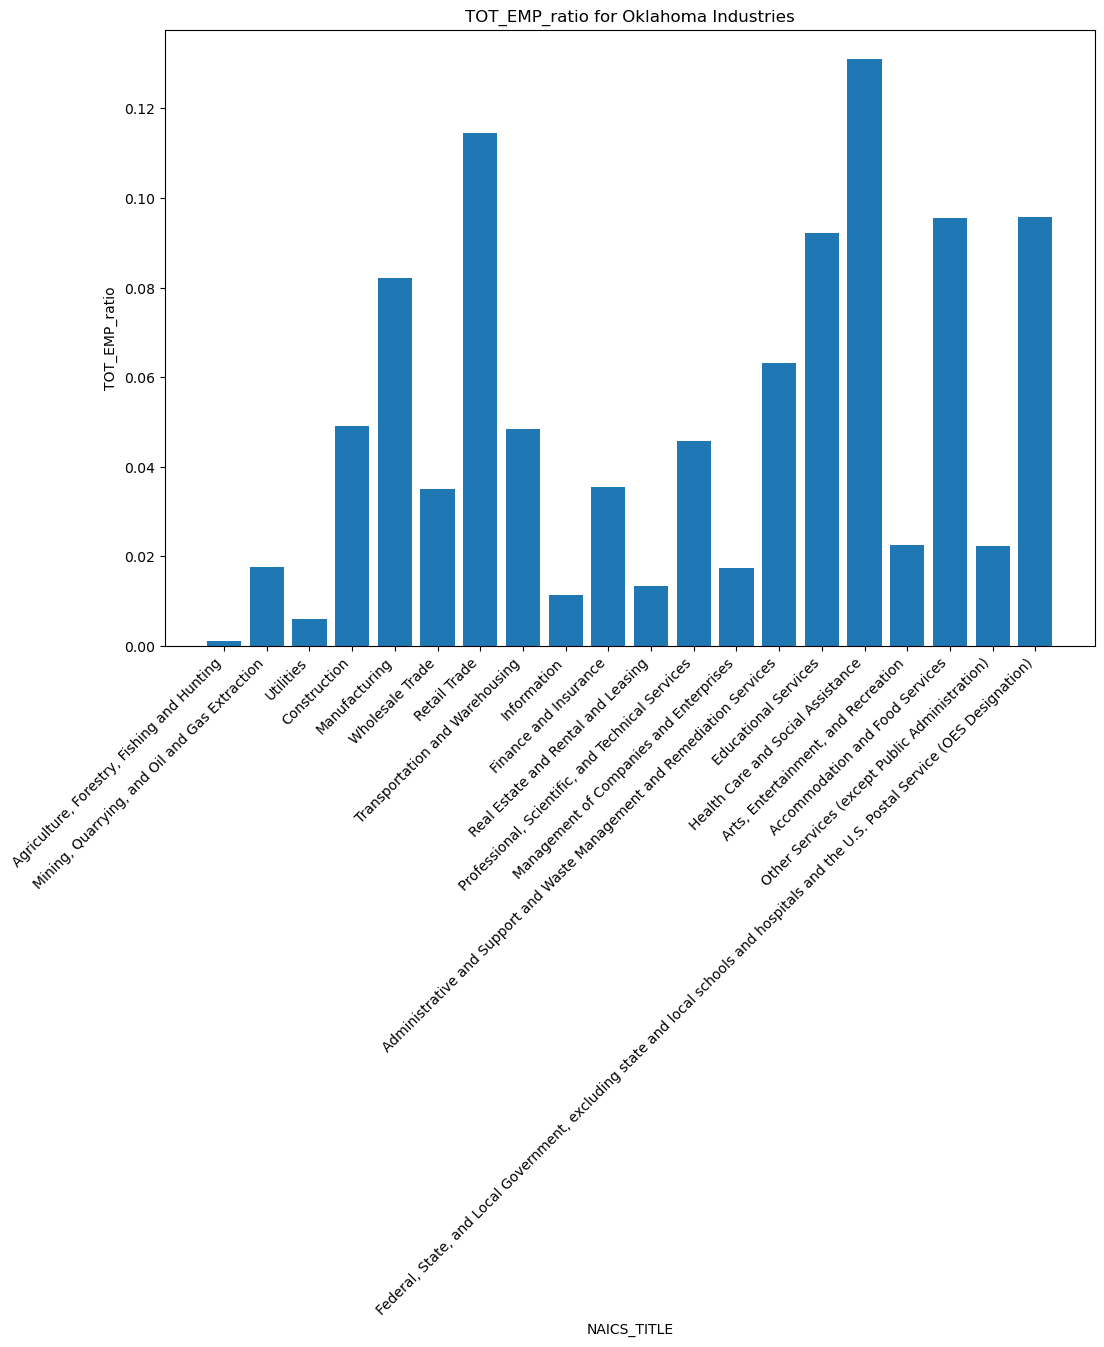

In [102]:
plt.figure(figsize=(12, 8))
plt.bar(oklahoma_industries['NAICS_TITLE'], oklahoma_industries['TOT_EMP_ratio'])
plt.xlabel('NAICS_TITLE')
plt.ylabel('TOT_EMP_ratio')
plt.title('TOT_EMP_ratio for Oklahoma Industries')
plt.xticks(rotation=45, ha='right')  
# Show the plot
plt.show()